In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [14]:
df = pd.read_csv('Student_Performance.csv')

In [16]:
df.drop(columns=['Sr. No'])
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [17]:
df = PCA(n_components=2).fit_transform(df)

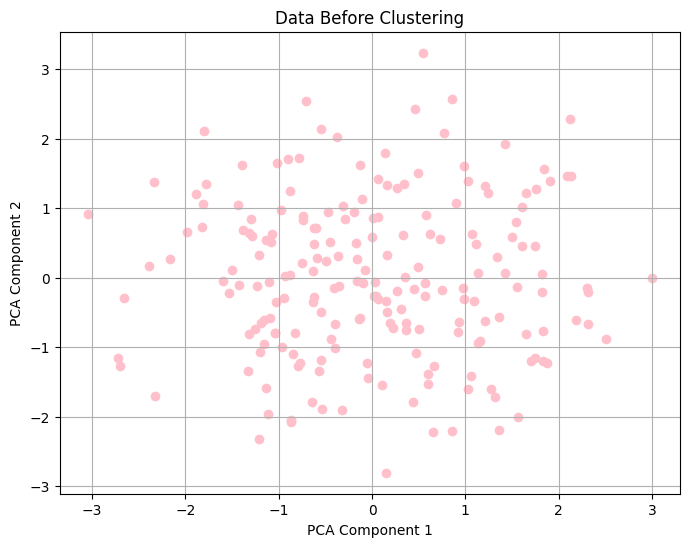

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df[:, 0], df[:, 1], c='pink')
plt.title('Data Before Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

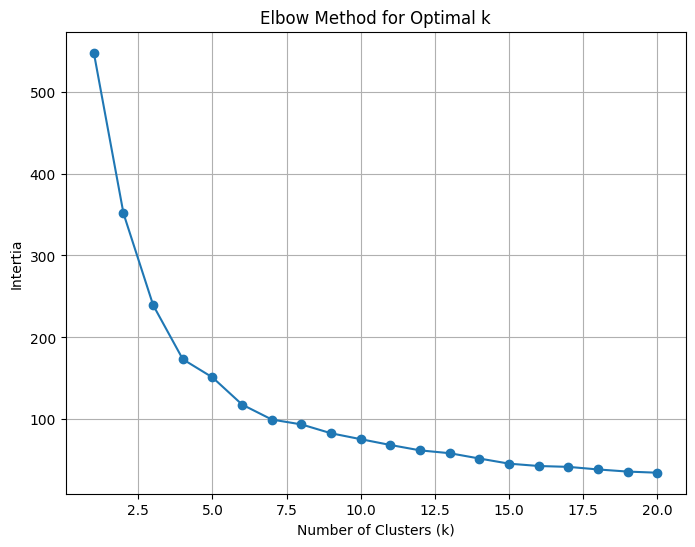

In [33]:
inertia = []
k_range = range(1, 21)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Intertia')
plt.grid(True)
plt.show()

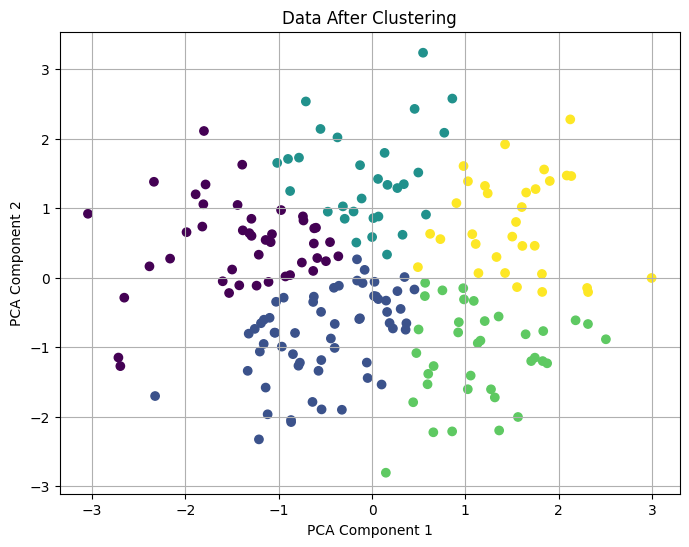

In [43]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)

plt.figure(figsize=(8, 6))
plt.scatter(df[:, 0], df[:, 1], c=clusters, cmap='viridis')
plt.title('Data After Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [39]:
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score: {sil_score:.3f}")
db_index = davies_bouldin_score(df, clusters)
print(f"Davies-Bouldin Index: {db_index:.3f}")
ch_index = calinski_harabasz_score(df, clusters)
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
inertia = kmeans.inertia_
print(f"Inertia (within-cluster sum of squares): {inertia:.2f}")

Silhouette Score: 0.338
Davies-Bouldin Index: 0.939
Calinski-Harabasz Index: 126.773
Inertia (within-cluster sum of squares): 239.37


In [ ]:
8579